In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kc_data = pd.read_csv('kc_house_data_cleaned.csv')

In [3]:
kc_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


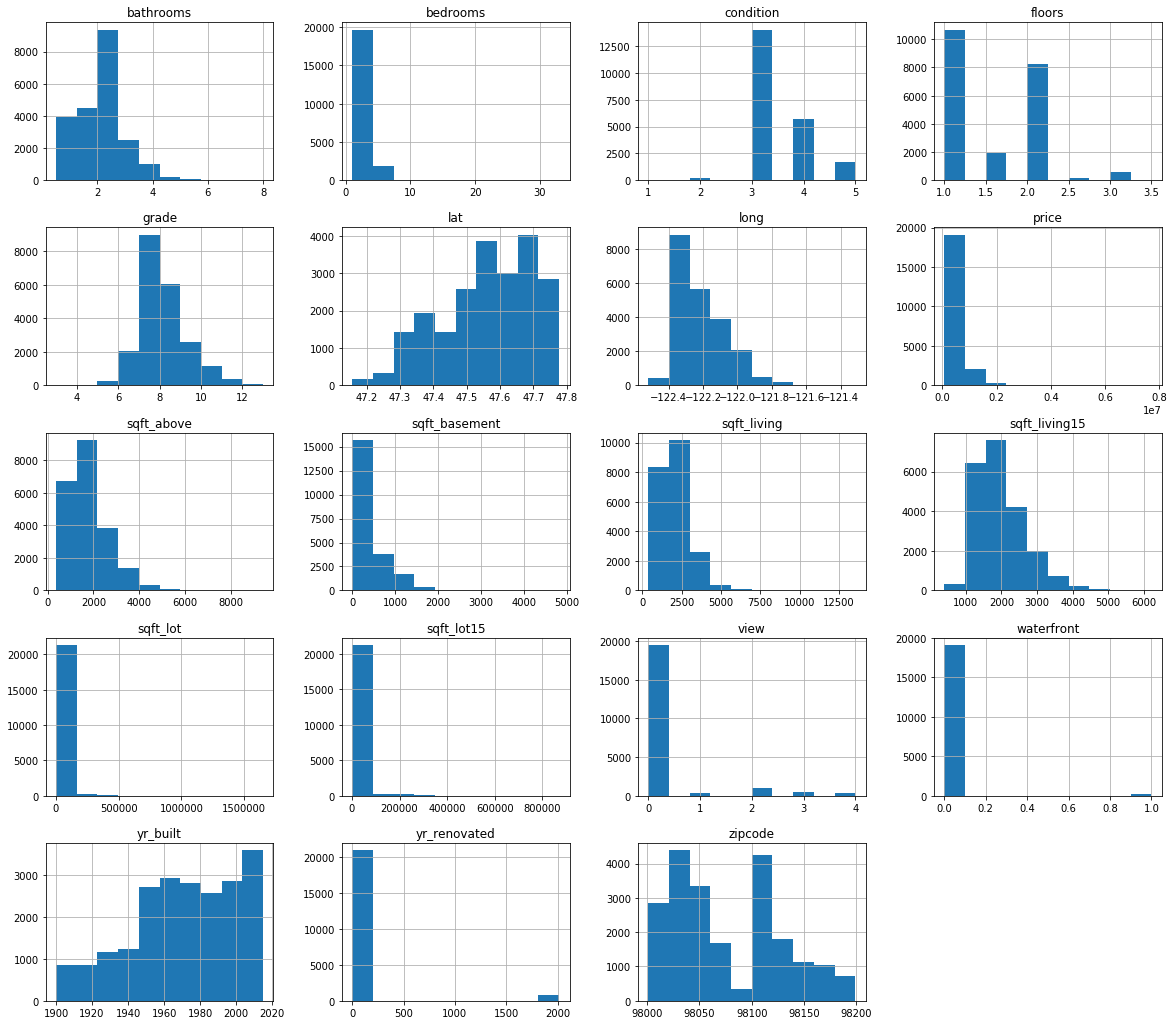

In [4]:
kc_data.hist(figsize=(20,18));

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

col_names = kc_data.describe().columns.drop(['price'])
results = [['target_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_data).fit()
    X_new = pd.DataFrame({val: [kc_data[val].min(), kc_data[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

['bedrooms', 0.09534970283730637, 127199.51268533088, 122464.44417420359, 0.0]
['bathrooms', 0.27657672267607736, 8712.65175267159, 251241.76249515932, 0.0]
['sqft_living', 0.49268789904035104, -43988.89219422742, 280.8630143588748, 0.0]
['sqft_lot', 0.008077735099594197, 528258.046513474, 0.7972846608151645, 5.57162202176598e-40]
['floors', 0.06594805661983061, 279114.9959148346, 174809.0532796366, 0.0]
['waterfront', 0.07633913918393076, 532641.9866841418, 1184572.7393432353, 0.0]
['view', 0.154839628812666, 496214.7728418562, 189045.800026694, 0.0]
['condition', 0.0013000622131944528, 470868.0489398099, 20361.313449484544, 1.1565566735107488e-07]
['grade', 0.44615823299735025, -1061415.9916200615, 209157.7760721361, 0.0]
['sqft_above', 0.3664703472658384, 59757.11100593517, 268.66840596728986, 0.0]
['sqft_basement', 0.10311007135689387, 463664.13032957516, 268.21139643354616, 0.0]
['yr_built', 0.002910962192005928, -789621.8059390178, 674.7430736386149, 2.117581295227859e-15]
['yr_r

In [6]:
kc_data_2 = pd.read_csv('kc_house_data_cleaned_2.csv')
kc_data_2 = kc_data_2.rename(columns={'waterfront_0.0':'waterfront_0', 'waterfront_1.0':'waterfront_1'})
kc_data_2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_0', 'waterfront_1', 'waterfront_NaN', 'zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075'

In [7]:
kc_data_2_sliced = kc_data_2.iloc[:,:16]
kc_data_2_sliced.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,0,1955,0,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,400,1951,1991,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,0,1933,0,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,910,1965,0,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,0,1987,0,47.6168,-122.045,1800,7503


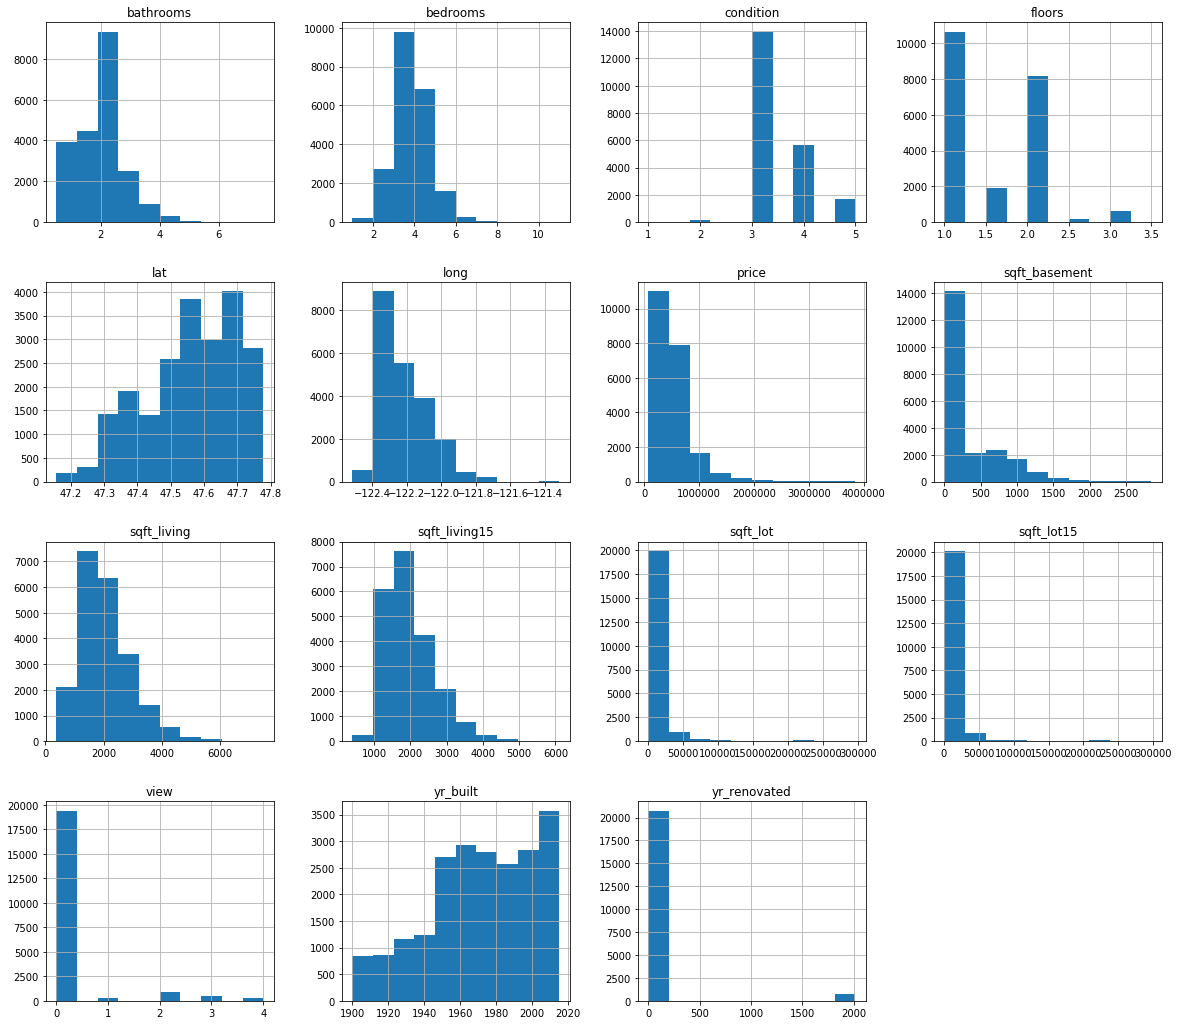

In [8]:
kc_data_2_sliced.hist(figsize=(20,18));

In [9]:
col_names = kc_data_2_sliced.describe().columns.drop(['price'])
results = [['target_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_data_2_sliced).fit()
    X_new = pd.DataFrame({val: [kc_data_2_sliced[val].min(), kc_data_2_sliced[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])

pd.DataFrame(results)

,0,1,2,3,4
0,target_var,r_squared,intercept,slope,p-value
1,bedrooms,0.100084,128550,120899,0
2,bathrooms,0.266153,41608.4,234206,0
3,sqft_living,0.475202,-15957.7,266.517,0
4,sqft_lot,0.00991701,518535,1.30892,1.68644e-48
5,floors,0.0687518,285870,167537,0
6,view,0.156973,494721,180374,0
7,condition,0.00175543,460291,22212.3,8.0153e-10
8,sqft_basement,0.0937506,466981,242.967,0
9,yr_built,0.00263732,-652105,602.82,4.94982e-14


In [10]:
kc_data_2_sliced = kc_data_2_sliced[kc_data_2_sliced.columns.drop('lat')]
kc_data_2_sliced = kc_data_2_sliced[kc_data_2_sliced.columns.drop('long')]

In [11]:
col_names = kc_data_2_sliced.describe().columns.drop(['price'])
results = [['target_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_data_2_sliced).fit()
    X_new = pd.DataFrame({val: [kc_data_2_sliced[val].min(), kc_data_2_sliced[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    
pd.DataFrame(results)

,0,1,2,3,4
0,target_var,r_squared,intercept,slope,p-value
1,bedrooms,0.100084,128550,120899,0
2,bathrooms,0.266153,41608.4,234206,0
3,sqft_living,0.475202,-15957.7,266.517,0
4,sqft_lot,0.00991701,518535,1.30892,1.68644e-48
5,floors,0.0687518,285870,167537,0
6,view,0.156973,494721,180374,0
7,condition,0.00175543,460291,22212.3,8.0153e-10
8,sqft_basement,0.0937506,466981,242.967,0
9,yr_built,0.00263732,-652105,602.82,4.94982e-14


In [12]:
cols_zip = kc_data_2.columns[19:]
cols_waterfront = kc_data_2.columns[16:18]

cols = [cols_zip, cols_waterfront]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= kc_data_2).fit()
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     234.5
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:00:42   Log-Likelihood:            -2.9849e+05
No. Observations:               21492   AIC:                         5.971e+05
Df Residuals:                   21422   BIC:                         5.977e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.453e+05   2055.958    265.234

In [13]:
y = kc_data_2[["price"]]
X = kc_data_2.drop(["price", "date"], axis=1)
X.head()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

C:\Users\ksiman\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False  True False False
 False False False]
[73 71 78 82 76 72 75 79 77 81 70 74 80 83 68 69 67  1  1  4 65 57 59 44
 49 23 31 26 21  6  2 35 42 27 43  5  7  1 56 33 17 66 64 10 25 48 51  9
 22 14 32 34 30 37 53 54 52 13 58 40 61 12 39 15 62 63 46 45 38 20 60 47
 29 24 18 36 41 16  1 19 28  1 50 11  3  8 55]


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21492 entries, 0 to 21491
Data columns (total 87 columns):
bedrooms          21492 non-null int64
bathrooms         21492 non-null float64
sqft_living       21492 non-null int64
sqft_lot          21492 non-null int64
floors            21492 non-null float64
view              21492 non-null float64
condition         21492 non-null int64
sqft_basement     21492 non-null int64
yr_built          21492 non-null int64
yr_renovated      21492 non-null int64
lat               21492 non-null float64
long              21492 non-null float64
sqft_living15     21492 non-null int64
sqft_lot15        21492 non-null int64
waterfront_0      21492 non-null int64
waterfront_1      21492 non-null int64
waterfront_NaN    21492 non-null int64
zipcode_98001     21492 non-null int64
zipcode_98002     21492 non-null int64
zipcode_98003     21492 non-null int64
zipcode_98004     21492 non-null int64
zipcode_98005     21492 non-null int64
zipcode_98006     21492

In [15]:
r_squareds = []
adj_r_squareds = []
num_features = list(range(5, 85, 5))
for num in num_features:
    selector = RFE(linreg, n_features_to_select=num)
    selector = selector.fit(X, y)
    estimators = selector.estimator_
    selected_columns = X.columns[selector.support_ ]
    linreg.fit(X[selected_columns],y)
    y_hat = linreg.predict(X[selected_columns])
    SS_RES = np.sum((y-y_hat)**2)
    SS_TOT = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_RES))/SS_TOT
    adj_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    r_squareds.append(r_squared)
    adj_r_squareds.append(adj_r_squared)

print(r_squareds)
print(adj_r_squareds)

C:\Users\ksiman\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ksiman\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ksiman\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ksiman\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sk

[price    0.032362
dtype: float64, price    0.070935
dtype: float64, price    0.118792
dtype: float64, price    0.16226
dtype: float64, price    0.212228
dtype: float64, price    0.23894
dtype: float64, price    0.261862
dtype: float64, price    0.286286
dtype: float64, price    0.308542
dtype: float64, price    0.330279
dtype: float64, price    0.358874
dtype: float64, price    0.385758
dtype: float64, price    0.412501
dtype: float64, price    0.430262
dtype: float64, price    0.636914
dtype: float64, price    0.684931
dtype: float64]
[price    0.028429
dtype: float64, price    0.067158
dtype: float64, price    0.115211
dtype: float64, price    0.158855
dtype: float64, price    0.209026
dtype: float64, price    0.235847
dtype: float64, price    0.258861
dtype: float64, price    0.283385
dtype: float64, price    0.305731
dtype: float64, price    0.327556
dtype: float64, price    0.356269
dtype: float64, price    0.383261
dtype: float64, price    0.410113
dtype: float64, price    0.427